In [1]:
from fcn import FCN
from voc_data_reader import VOCDataReader
import tensorflow as tf
import numpy as np
import cv2
import os, sys
import matplotlib.pyplot as plt
import logging

logging.basicConfig(level = logging.DEBUG)
logging.debug('Init logging')
%matplotlib inline

DEBUG:root:Init logging


In [2]:
TRAINVAL_ROOT_DIR = '/home/paperspace/PASCAL-VOC-Dataset/TrainVal'
TEST_ROOT_DIR = '/home/paperspace/PASCAL-VOC-Dataset/Test'
VGG_PARAMS_ROOT_DIR = '/home/paperspace/FCN/vgg-weights'

fcn = FCN(TRAINVAL_ROOT_DIR, TEST_ROOT_DIR, VGG_PARAMS_ROOT_DIR)
dsr = VOCDataReader(TRAINVAL_ROOT_DIR, TEST_ROOT_DIR)

fcn.train(0, 1, 1, '/home/paperspace/FCN/best_params_coarse/fcn_1800.ckpt')

DEBUG:get_vgg_params:VGG Keys: dict_keys(['conv5_1', 'fc6', 'conv5_3', 'conv5_2', 'fc8', 'fc7', 'conv4_1', 'conv4_2', 'conv4_3', 'conv3_3', 'conv3_2', 'conv3_1', 'conv1_1', 'conv1_2', 'conv2_2', 'conv2_1'])


INFO:tensorflow:Restoring parameters from /home/paperspace/FCN/best_params_coarse/fcn_1800.ckpt


INFO:tensorflow:Restoring parameters from /home/paperspace/FCN/best_params_coarse/fcn_1800.ckpt
DEBUG:FCN:========= COARSE TRAINING =========
DEBUG:FCN:========= FINE TRAINING =========
DEBUG:VOCDataReader:Batch selected: ['2010_004683']
DEBUG:VOCDataReader:(333, 500)
DEBUG:FCN:Iteration #0 average train loss: 2.3797621726989746
DEBUG:FCN:Found best fine params! Saving to best_params_fine/
DEBUG:FCN:Model params after 1 iterations saved to best_params_fine/fcn_1.ckpt


In [3]:
tb = dsr.next_train_batch(1)
images = tb['batch']
names = tb['names']
for i in images:
    img = i
# img = np.reshape(img, [1, img.shape[0], img.shape[1], img.shape[2]])
output_coarse = fcn.infer(img, '/home/paperspace/FCN/best_params_coarse/fcn_1800.ckpt')
output_fine = fcn.infer(img, '/home/paperspace/FCN/best_params_fine/fcn_1.ckpt')

def label_matrix_to_image(label_mat, image_file = None):
    def convert(label_mod):
        # logging.debug('trying to hash {}'.format(label))
        label = label_mod[0]
        return np.array(dsr.voc_color_map[label], dtype=np.float32)
    logging.debug('Label mat shape: {}'.format(label_mat.shape))
    label_mat[label_mat == 21] = 255
    np.set_printoptions(threshold=np.nan)
    # logging.debug('{}'.format(label_mat))
    label_mat = np.expand_dims(label_mat, axis=2)
    label_mat = np.concatenate([label_mat, np.zeros(label_mat.shape), np.zeros(label_mat.shape)], axis=2)
    img_mat = np.apply_along_axis(convert, 2, label_mat)
    logging.debug('Converted shape: {}'.format(img_mat.shape))
    if image_file is not None:
        plt.imsave(fname=image_file, arr=img_mat, format='png')
    return img_mat

DEBUG:VOCDataReader:Batch selected: ['2011_001139']


INFO:tensorflow:Restoring parameters from /home/paperspace/FCN/best_params_coarse/fcn_1800.ckpt


INFO:tensorflow:Restoring parameters from /home/paperspace/FCN/best_params_coarse/fcn_1800.ckpt
DEBUG:FCN:Inference output shape: (375, 500)


INFO:tensorflow:Restoring parameters from /home/paperspace/FCN/best_params_fine/fcn_1.ckpt


INFO:tensorflow:Restoring parameters from /home/paperspace/FCN/best_params_fine/fcn_1.ckpt
DEBUG:FCN:Inference output shape: (375, 500)


DEBUG:root:Label mat shape: (375, 500)
DEBUG:root:Converted shape: (375, 500, 3)


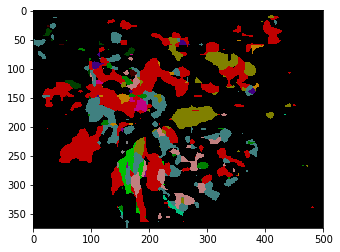

In [4]:
plt.imshow(label_matrix_to_image(output_coarse))

DEBUG:root:Label mat shape: (375, 500)
DEBUG:root:Converted shape: (375, 500, 3)


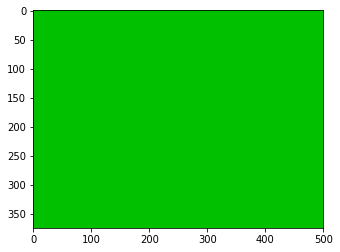

In [5]:
plt.imshow(label_matrix_to_image(output_fine))

In [6]:
print(output_fine[:3,:3])

[[16 16 16]
 [16 16 16]
 [16 16 16]]


In [7]:
from tensorflow.python.tools.inspect_checkpoint import print_tensors_in_checkpoint_file
print_tensors_in_checkpoint_file(file_name='best_params_fine/fcn_1.ckpt', tensor_name='', all_tensors=True)

tensor_name:  Variable
[[[[  4.32360053e-01   1.20163523e-01   3.69024798e-02   3.51331294e-01
     -8.94733220e-02   2.32572615e-01   6.39433637e-02   3.84487286e-02
      1.33157343e-01   3.57999876e-02   9.32651684e-02  -9.51149091e-02
     -1.58762887e-01   5.51864542e-02  -8.61335173e-02   1.60177290e-01
      2.62299515e-02   5.38379326e-02   1.93447128e-01  -4.66119125e-02
      3.64692777e-01   2.36139134e-01   1.69561580e-01  -1.77577883e-01
      4.69378382e-02   9.88180190e-02  -4.09217253e-02  -1.91373140e-01
     -4.68846485e-02  -1.92744106e-01  -2.36759394e-01   1.31257027e-01
     -1.13489367e-01   8.60300567e-03  -2.41906911e-01  -3.08192462e-01
      6.38276413e-02  -3.25273007e-01   1.74084663e-01   1.05543703e-01
     -1.07747123e-01   3.27240527e-01  -6.15868531e-02   1.81897521e-01
      1.33981779e-02   1.03790618e-01  -1.27979681e-01  -3.65729123e-01
      6.72977194e-02   9.62492824e-02   6.90583093e-03   3.81037712e-01
      4.97984178e-02  -2.73679018e-01   1

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


KeyboardInterrupt: 

In [9]:
print_tensors_in_checkpoint_file(file_name='best_params_coarse/fcn_1800.ckpt', tensor_name='', all_tensors=True)

tensor_name:  Variable
[[[[  4.29470569e-01   1.17273867e-01   3.40129584e-02   3.54220927e-01
     -8.65836963e-02   2.29682952e-01   6.68324158e-02   4.13383804e-02
      1.30267844e-01   3.29103470e-02   9.61545706e-02  -9.22253206e-02
     -1.55873314e-01   5.22967987e-02  -8.32441747e-02   1.57287687e-01
      2.91195959e-02   5.09483516e-02   1.90557480e-01  -4.37222868e-02
      3.61803114e-01   2.39028737e-01   1.66671917e-01  -1.80467457e-01
      4.40482050e-02   9.59283710e-02  -4.38113064e-02  -1.88483506e-01
     -4.39950228e-02  -1.89854458e-01  -2.33869821e-01   1.28367439e-01
     -1.10599749e-01   5.71336085e-03  -2.44796559e-01  -3.05302829e-01
      6.09379970e-02  -3.28162521e-01   1.71195298e-01   1.02654070e-01
     -1.10636652e-01   3.30129862e-01  -5.86972833e-02   1.84787169e-01
      1.05085261e-02   1.06680267e-01  -1.30869240e-01  -3.62839460e-01
      6.44080713e-02   9.33597162e-02   4.01619263e-03   3.78148049e-01
      5.26880398e-02  -2.70789355e-01   1

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


KeyboardInterrupt: 